# 以密度為基礎的集群(Density-based spatial clustering of applications with noise, DBSCAN)

## 載入相關套件

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

## 生成資料

In [2]:
X = np.array([[1, 2], [2, 2], [2, 3],
              [3.2, 6],[6, 7],
              [8, 7], [8, 8], [25, 80]])
X

array([[ 1. ,  2. ],
       [ 2. ,  2. ],
       [ 2. ,  3. ],
       [ 3.2,  6. ],
       [ 6. ,  7. ],
       [ 8. ,  7. ],
       [ 8. ,  8. ],
       [25. , 80. ]])

## 模型訓練

In [3]:
model = DBSCAN(eps=3, min_samples=2).fit(X)
model.labels_

array([ 0,  0,  0,  1,  1,  1,  1, -1])

## 生成更多資料，且非線性

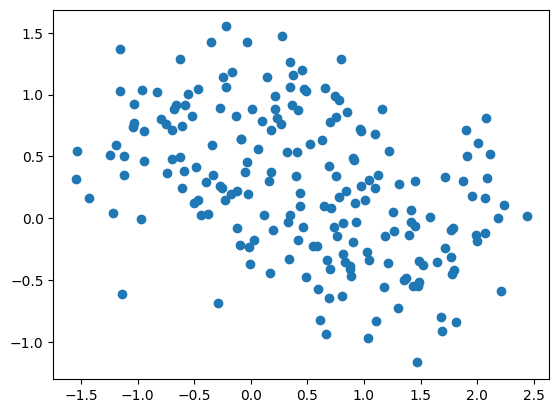

In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.3, random_state=0) # 產生月牙型資料, n_sample = 200筆樣本, noise:雜訊分散狀態, 數值愈大愈分散, random_state:隨機種子
plt.scatter(X[:, 0], X[:, 1])

## 模型訓練，繪製結果

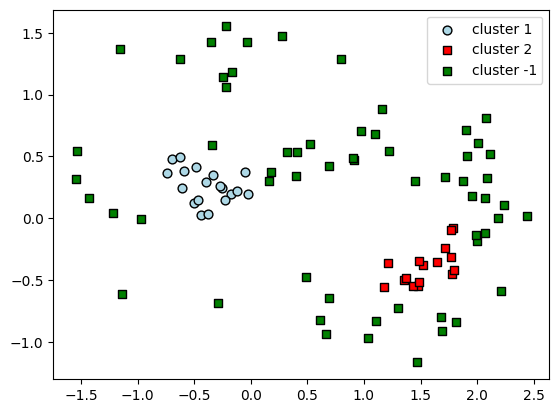

In [7]:
db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean') # eps:半徑, min_samples:半徑內最少幾個點
y_pred = db.fit_predict(X)
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='cluster 1')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='cluster 2')
plt.scatter(X[y_pred <0, 0], X[y_pred <0, 1],
            c='green', marker='s', s=40,
            edgecolor='black', 
            label='cluster -1')
plt.legend()

In [8]:
len(X[y_pred == -1, 0])

60

## 另一個範例，參閱[Demo of DBSCAN clustering algorithm](https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py)

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]] # 三個群集的中心點
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0 # 產生750筆資料, cluster_std:標準差,數值愈大愈鬆散, random_state:隨機種子
)

X = StandardScaler().fit_transform(X)

## 繪製資料

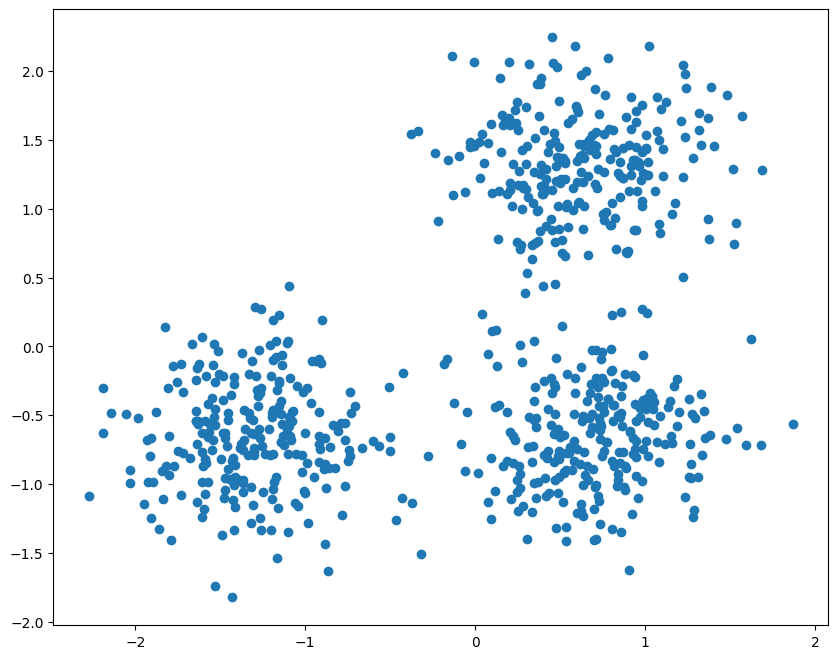

In [11]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1])

## 模型訓練

In [ ]:
labels = DBSCAN(eps=0.2, min_samples=5).fit_predict(X)

# 計算集群內樣本數、雜訊點個數
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) # 集群數, -1表示雜訊點, 所以要扣掉
n_noise_ = list(labels).count(-1) # 雜訊點個數

print(f"集群數={n_clusters_}")
print(f"雜訊點個數={n_noise_}")

集群數=3
雜訊點個數=40


## 模型評估
評估效果數據沒有太多幫助,不建議

In [13]:
from sklearn import metrics

print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

Homogeneity: 0.939
Completeness: 0.827
V-measure: 0.880
Adjusted Rand Index: 0.914
Adjusted Mutual Information: 0.879
Silhouette Coefficient: 0.600


## 繪製結果

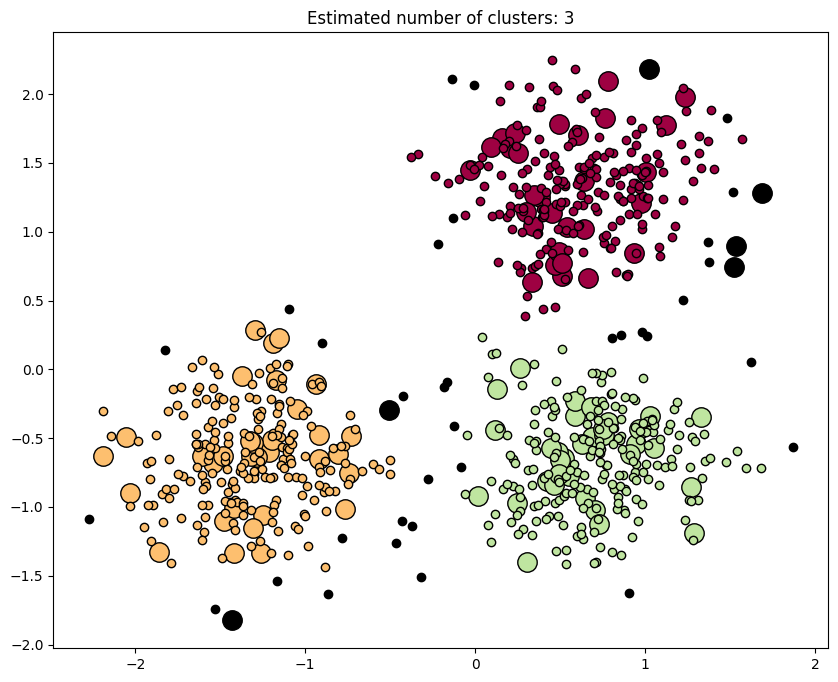

In [ ]:
plt.figure(figsize=(10, 8))
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")